In [29]:
import os, sys
import iris
import iris.coord_categorisation
import matplotlib.pyplot as plt
import iris.plot as iplt
import numpy as np
import pandas as pd
import seaborn as sns

cwd = os.getcwd()
repo_dir = '/'
for directory in cwd.split('/')[1:]:
    repo_dir = os.path.join(repo_dir, directory)
    if directory == 'ocean-analysis':
        break

modules_dir = os.path.join(repo_dir, 'modules')
sys.path.append(modules_dir)
try:
    import general_io as gio
except ImportError:
    raise ImportError('Must run this script from anywhere within the ocean-analysis git repo')


In [4]:
# historical, historicalGHG, historicalMisc

file_dict = {}

file_dict['CanESM2'] = ['/g/data/r87/dbi599/CMIP5/CMIP/CCCma/CanESM2/historical/r1i1p1/Oyr/pe/gn/v20120718/pe-zonal-region-sum-anomaly_Ayr_CanESM2_historical_r1i1p1_gn_185001-200512-cumsum.nc',
                        '/g/data/r87/dbi599/CMIP5/DAMIP/CCCma/CanESM2/historicalGHG/r1i1p1/Oyr/pe/gn/v20111027/pe-zonal-region-sum-anomaly_Ayr_CanESM2_historicalGHG_r1i1p1_gn_185001-201212-cumsum.nc',
                        '/g/data/r87/dbi599/CMIP5/DAMIP/CCCma/CanESM2/historicalMisc/r1i1p4/Oyr/pe/gn/v20111028/pe-zonal-region-sum-anomaly_Ayr_CanESM2_historicalMisc_r1i1p4_gn_185001-201212-cumsum.nc']

file_dict['CCSM4'] = ['/g/data/r87/dbi599/CMIP5/CMIP/NCAR/CCSM4/historical/r1i1p1/Oyr/pe/gn/v20160829/pe-zonal-region-sum-anomaly_Ayr_CCSM4_historical_r1i1p1_gn_185001-200512-cumsum.nc',
                      '/g/data/r87/dbi599/CMIP5/DAMIP/NCAR/CCSM4/historicalGHG/r1i1p1/Oyr/pe/gn/v20120604/pe-zonal-region-sum-anomaly_Ayr_CCSM4_historicalGHG_r1i1p1_gn_185001-200512-cumsum.nc',
                      '/g/data/r87/dbi599/CMIP5/DAMIP/NCAR/CCSM4/historicalMisc/r1i1p10/Oyr/pe/gn/v20120604/pe-zonal-region-sum-anomaly_Ayr_CCSM4_historicalMisc_r1i1p10_gn_185001-200512-cumsum.nc']

file_dict['CSIRO-Mk3-6-0'] = ['/g/data/r87/dbi599/CMIP5/CMIP/CSIRO-QCCCE/CSIRO-Mk3-6-0/historical/r1i1p1/Oyr/pe/gn/v20110518/pe-zonal-region-sum-anomaly_Ayr_CSIRO-Mk3-6-0_historical_r1i1p1_gn_185001-200512-cumsum.nc',
                              '/g/data/r87/dbi599/CMIP5/DAMIP/CSIRO-QCCCE/CSIRO-Mk3-6-0/historicalGHG/r1i1p1/Oyr/pe/gn/v20110518/pe-zonal-region-sum-anomaly_Ayr_CSIRO-Mk3-6-0_historicalGHG_r1i1p1_gn_185001-201212-cumsum.nc',
                              '/g/data/r87/dbi599/CMIP5/DAMIP/CSIRO-QCCCE/CSIRO-Mk3-6-0/historicalMisc/r1i1p4/Oyr/pe/gn/v20110518/pe-zonal-region-sum-anomaly_Ayr_CSIRO-Mk3-6-0_historicalMisc_r1i1p4_gn_185001-201212-cumsum.nc']

file_dict['FGOALS-g2'] = ['/g/data/r87/dbi599/CMIP5/CMIP/LASG-CESS/FGOALS-g2/historical/r1i1p1/Oyr/pe/gn/v1/pe-zonal-region-sum-anomaly_Ayr_FGOALS-g2_historical_r1i1p1_gn_185001-201412-cumsum.nc',
                          '/g/data/r87/dbi599/CMIP5/DAMIP/LASG-CESS/FGOALS-g2/historicalGHG/r1i1p1/Oyr/pe/gn/v20161204/pe-zonal-region-sum-anomaly_Ayr_FGOALS-g2_historicalGHG_r1i1p1_gn_185001-200512-cumsum.nc',
                          '/g/data/r87/dbi599/CMIP5/DAMIP/LASG-CESS/FGOALS-g2/historicalMisc/r2i1p1/Oyr/pe/gn/v20161204/pe-zonal-region-sum-anomaly_Ayr_FGOALS-g2_historicalMisc_r2i1p1_gn_185001-200512-cumsum.nc']

file_dict['GFDL-CM3'] = ['/g/data/r87/dbi599/CMIP5/CMIP/NOAA-GFDL/GFDL-CM3/historical/r1i1p1/Oyr/pe/gn/v20120227/pe-zonal-region-sum-anomaly_Ayr_GFDL-CM3_historical_r1i1p1_gn_186001-200512-cumsum.nc',
                         '/g/data/r87/dbi599/CMIP5/DAMIP/NOAA-GFDL/GFDL-CM3/historicalGHG/r1i1p1/Oyr/pe/gn/v20120227/pe-zonal-region-sum-anomaly_Ayr_GFDL-CM3_historicalGHG_r1i1p1_gn_186001-200512-cumsum.nc',
                         None]
#dataset_id=cmip5.output1.NOAA-GFDL.GFDL-CM3.historicalMisc.mon.atmos.Amon.r1i1p1.v20120227

file_dict['GFDL-ESM2M'] = ['/g/data/r87/dbi599/CMIP5/CMIP/NOAA-GFDL/GFDL-ESM2M/historical/r1i1p1/Oyr/pe/gn/v20111228/pe-zonal-region-sum-anomaly_Ayr_GFDL-ESM2M_historical_r1i1p1_gn_185001-200512-cumsum.nc',
                           '/g/data/r87/dbi599/CMIP5/CMIP/NOAA-GFDL/GFDL-ESM2M/historicalGHG/r1i1p1/Oyr/pe/gn/v20130214/pe-zonal-region-sum-anomaly_Ayr_GFDL-ESM2M_historicalGHG_r1i1p1_gn_185001-200512-cumsum.nc',
                           None]
#dataset_id=cmip5.output1.NOAA-GFDL.GFDL-ESM2M.historicalMisc.mon.atmos.Amon.r1i1p5.v20130214

file_dict['GISS-E2-H'] = ['/g/data/r87/dbi599/CMIP5/CMIP/NASA-GISS/GISS-E2-H/historical/r1i1p1/Oyr/pe/gn/v20160426/pe-zonal-region-sum-anomaly_Ayr_GISS-E2-H_historical_r1i1p1_gn_185001-200512-cumsum.nc',
                          '/g/data/r87/dbi599/CMIP5/DAMIP/NASA-GISS/GISS-E2-H/historicalGHG/r1i1p1/Oyr/pe/gn/v20160426/pe-zonal-region-sum-anomaly_Ayr_GISS-E2-H_historicalGHG_r1i1p1_gn_185001-201212-cumsum.nc',
                          '/g/data/r87/dbi599/CMIP5/DAMIP/NASA-GISS/GISS-E2-H/historicalMisc/r1i1p107/Oyr/pe/gn/v20160427/pe-zonal-region-sum-anomaly_Ayr_GISS-E2-H_historicalMisc_r1i1p107_gn_185001-200512-cumsum.nc']
#dataset_id=cmip5.output1.NASA-GISS.GISS-E2-H.historicalMisc.mon.atmos.Amon.r1i1p310.v20160427

file_dict['GISS-E2-R'] = ['/g/data/r87/dbi599/CMIP5/CMIP/NASA-GISS/GISS-E2-R/historical/r1i1p1/Oyr/pe/gn/v20160502/pe-zonal-region-sum-anomaly_Ayr_GISS-E2-R_historical_r1i1p1_gn_185001-200512-cumsum.nc',
                          '/g/data/r87/dbi599/CMIP5/DAMIP/NASA-GISS/GISS-E2-R/historicalGHG/r1i1p1/Oyr/pe/gn/v20160429/pe-zonal-region-sum-anomaly_Ayr_GISS-E2-R_historicalGHG_r1i1p1_gn_185001-201212-cumsum.nc',
                          '/g/data/r87/dbi599/CMIP5/DAMIP/NASA-GISS/GISS-E2-R/historicalMisc/r1i1p310/Oyr/pe/gn/v20160503/pe-zonal-region-sum-anomaly_Ayr_GISS-E2-R_historicalMisc_r1i1p310_gn_185001-201212-cumsum.nc']
#dataset_id=cmip5.output1.NASA-GISS.GISS-E2-R.historicalMisc.mon.atmos.Amon.r1i1p107.v20160503

file_dict['IPSL-CM5A-LR'] = ['/g/data/r87/dbi599/CMIP5/CMIP/IPSL/IPSL-CM5A-LR/historical/r1i1p1/Oyr/pe/gn/v20110406/pe-zonal-region-sum-anomaly_Ayr_IPSL-CM5A-LR_historical_r1i1p1_gn_185001-200512-cumsum.nc',
                             '/g/data/r87/dbi599/CMIP5/DAMIP/IPSL/IPSL-CM5A-LR/historicalGHG/r1i1p1/Oyr/pe/gn/v20120526/pe-zonal-region-sum-anomaly_Ayr_IPSL-CM5A-LR_historicalGHG_r1i1p1_gn_185001-201212-cumsum.nc',
                             None]
#dataset_id=cmip5.output1.IPSL.IPSL-CM5A-LR.historicalMisc.mon.atmos.Amon.r1i1p3.v20111119

file_dict['NorESM1-M'] = ['/g/data/r87/dbi599/CMIP5/CMIP/NCC/NorESM1-M/historical/r1i1p1/Oyr/pe/gn/v20110901/pe-zonal-region-sum-anomaly_Ayr_NorESM1-M_historical_r1i1p1_gn_185001-200512-cumsum.nc',
                          '/g/data/r87/dbi599/CMIP5/DAMIP/NCC/NorESM1-M/historicalGHG/r1i1p1/Oyr/pe/gn/v20110918/pe-zonal-region-sum-anomaly_Ayr_NorESM1-M_historicalGHG_r1i1p1_gn_185001-201212-cumsum.nc',
                          '/g/data/r87/dbi599/CMIP5/DAMIP/NCC/NorESM1-M/historicalMisc/r1i1p1/Oyr/pe/gn/v20110918/pe-zonal-region-sum-anomaly_Ayr_NorESM1-M_historicalMisc_r1i1p1_gn_185001-201212-cumsum.nc']

In [5]:
def get_data(infile, time_constraint):
    """Get the data for a particular model"""
    
    cube = iris.load_cube(infile, 'precipitation minus evaporation flux' & time_constraint)
    iris.coord_categorisation.add_year(cube, 'time')
    anomaly_data = cube.data - cube.data[0, :]
    
    return cube, anomaly_data

In [90]:
def plot_data(model):
    """Create the plot"""

    output = []
    hist_file, ghg_file, aa_file = file_dict[model]
    time_constraint = gio.get_time_constraint(['1861-01-01', '2005-12-31'])
    
    hist_cube, hist_anomaly_data = get_data(hist_file, time_constraint)
    ghg_cube, ghg_anomaly_data = get_data(ghg_file, time_constraint)
    if aa_file:
        aa_cube, aa_anomaly_data = get_data(aa_file, time_constraint)
    else:
        aa_cube = aa_anomaly_data = None
    
    fig = plt.figure(figsize=[16,12])
    ax0 = plt.subplot2grid((3,6), (0,2), colspan=2)
    ax1 = plt.subplot2grid(shape=(3,6), loc=(1,0), colspan=2)
    ax2 = plt.subplot2grid((3,6), (1,2), colspan=2)
    ax3 = plt.subplot2grid((3,6), (1,4), colspan=2)
    ax4 = plt.subplot2grid((3,6), (2,1), colspan=2)
    ax5 = plt.subplot2grid((3,6), (2,3), colspan=2)

    xvals = [0, 1, 2, 3, 4]
    ax0.bar(xvals, hist_cube.data[0, :], color='0.5')
    ax0.set_ylabel('kg')
    ax0.set_xticklabels(['', 'SH precip', 'SH evap', 'trop precip', 'NH evap', 'NH precip'])
    ax0.set_title('Year One')

    hist_years = hist_cube.coord('year').points
    ghg_years = ghg_cube.coord('year').points
    if aa_cube:
        aa_years = aa_cube.coord('year').points
    
    max_value = np.abs(ghg_anomaly_data).max() * 1.1

    ax1.plot(ghg_years, ghg_anomaly_data[:,0], color='red', label='GHG-only')
    ax1.plot(hist_years, hist_anomaly_data[:,0], color='black', label='historical')
    if aa_cube:
        ax1.plot(aa_years, aa_anomaly_data[:,0], color='blue', label='AA-only')
    ax1.set_title('SH precip')
    ax1.set_ylabel('kg')
    ax1.set_ylim([-max_value, max_value])
    ax1.grid(True, color='0.8', linestyle='--')
    ax1.legend()

    ax4.plot(ghg_years, ghg_anomaly_data[:,1], color='red', label='GHG-only')
    ax4.plot(hist_years, hist_anomaly_data[:,1], color='black', label='historical')
    if aa_cube:
        ax4.plot(aa_years, aa_anomaly_data[:,1], color='blue', label='AA-only')
    ax4.set_title('SH evap')
    ax4.set_ylabel('kg')
    ax4.set_ylim([-max_value, max_value])
    ax4.grid(True, color='0.8', linestyle='--')

    ax2.plot(ghg_years, ghg_anomaly_data[:,2], color='red', label='GHG-only')
    ax2.plot(hist_years, hist_anomaly_data[:,2], color='black', label='historical')
    if aa_cube:
        ax2.plot(aa_years, aa_anomaly_data[:,2], color='blue', label='AA-only')
    ax2.set_title('tropical precip')
    ax2.set_ylim([-max_value, max_value])
    ax2.grid(True, color='0.8', linestyle='--')

    ax5.plot(ghg_years, ghg_anomaly_data[:,3], color='red', label='GHG-only')
    ax5.plot(hist_years, hist_anomaly_data[:,3], color='black', label='historical')
    if aa_cube:
        ax5.plot(aa_years, aa_anomaly_data[:,3], color='blue', label='AA-only')
    ax5.set_title('NH evap')
    ax5.set_ylim([-max_value, max_value])
    ax5.grid(True, color='0.8', linestyle='--')

    ax3.plot(ghg_years, ghg_anomaly_data[:,4], color='red', label='GHG-only')
    ax3.plot(hist_years, hist_anomaly_data[:,4], color='black', label='historical')
    if aa_cube:
        ax3.plot(aa_years, aa_anomaly_data[:,4], color='blue', label='AA-only')
    ax3.set_title('NH precip')
    ax3.set_ylim([-max_value, max_value])
    ax3.grid(True, color='0.8', linestyle='--')

    #ax3.set_yticks([])
    fig.tight_layout()
    plt.show()
    
    data = [[model, 'GHG-only', 'SH precip', ghg_anomaly_data[-1, 0]],
            [model, 'historical', 'SH precip', hist_anomaly_data[-1, 0]],
            [model, 'AA-only', 'SH precip', aa_anomaly_data[-1, 0] if aa_cube else None],
            [model, 'GHG-only', 'SH evap', ghg_anomaly_data[-1, 1]],
            [model, 'historical', 'SH evap', hist_anomaly_data[-1, 1]],
            [model, 'AA-only', 'SH evap', aa_anomaly_data[-1, 1] if aa_cube else None],
            [model, 'GHG-only', 'tropical precip', ghg_anomaly_data[-1, 2]],
            [model, 'historical', 'tropical precip', hist_anomaly_data[-1, 2]],
            [model, 'AA-only', 'tropical precip', aa_anomaly_data[-1, 2] if aa_cube else None],
            [model, 'GHG-only', 'NH evap', ghg_anomaly_data[-1, 3]],
            [model, 'historical', 'NH evap', hist_anomaly_data[-1, 3]],
            [model, 'AA-only', 'NH evap', aa_anomaly_data[-1, 3] if aa_cube else None],
            [model, 'GHG-only', 'NH precip', ghg_anomaly_data[-1, 4]],
            [model, 'historical', 'NH precip', hist_anomaly_data[-1, 4]],
            [model, 'AA-only', 'NH precip', aa_anomaly_data[-1, 4] if aa_cube else None]]
           
    df = pd.DataFrame(data, columns = ['model', 'experiment', 'region', 'change'])
    
    return df

In [91]:
df_dict = {}

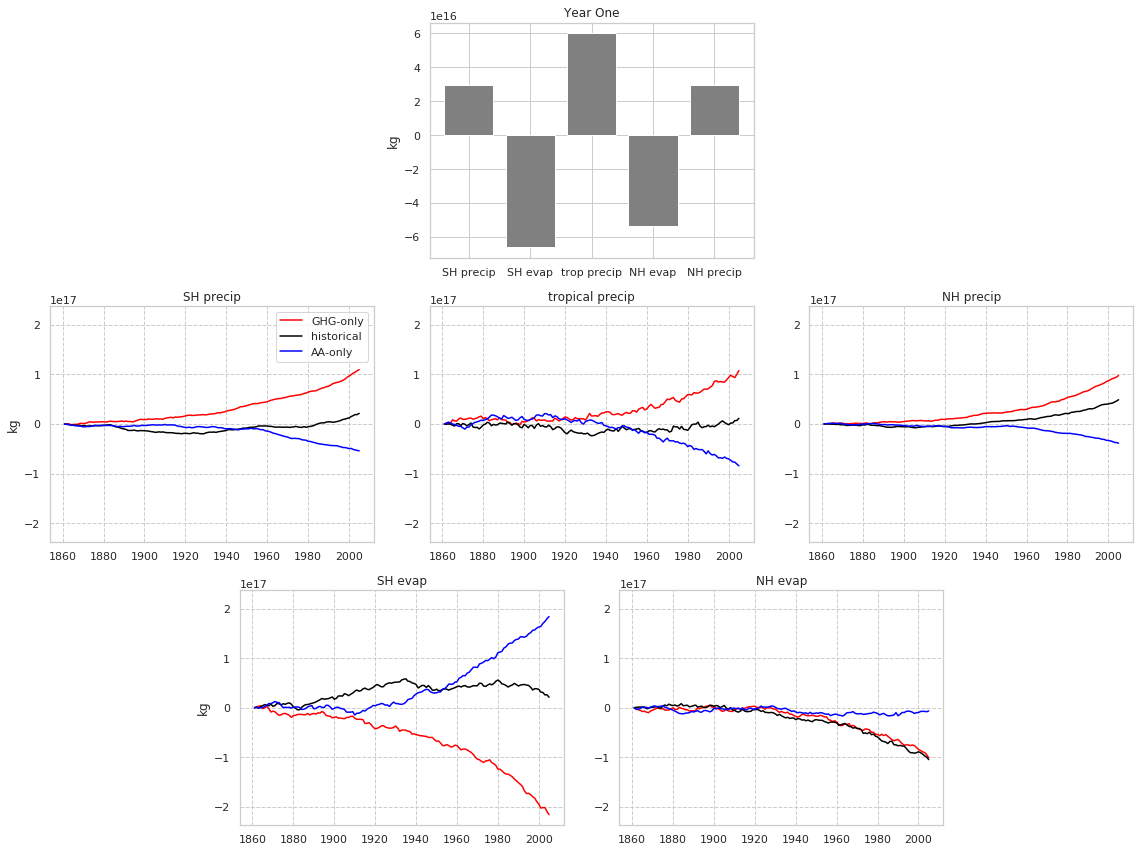

In [92]:
df_dict['CanESM2'] = plot_data('CanESM2')

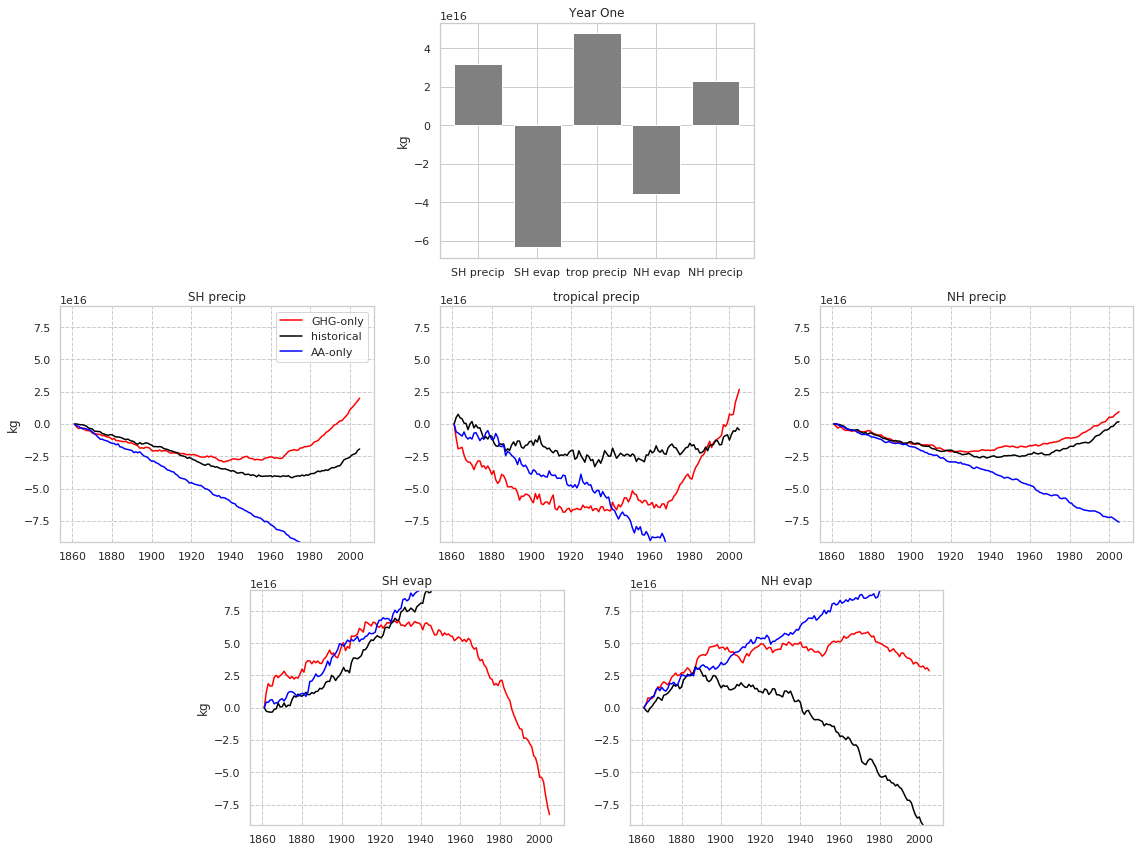

In [93]:
df_dict['FGOALS-g2'] = plot_data('FGOALS-g2')

Try removing the actual accumulated piControl, not a cubic fit? (Try some other models first and come back to this one.)

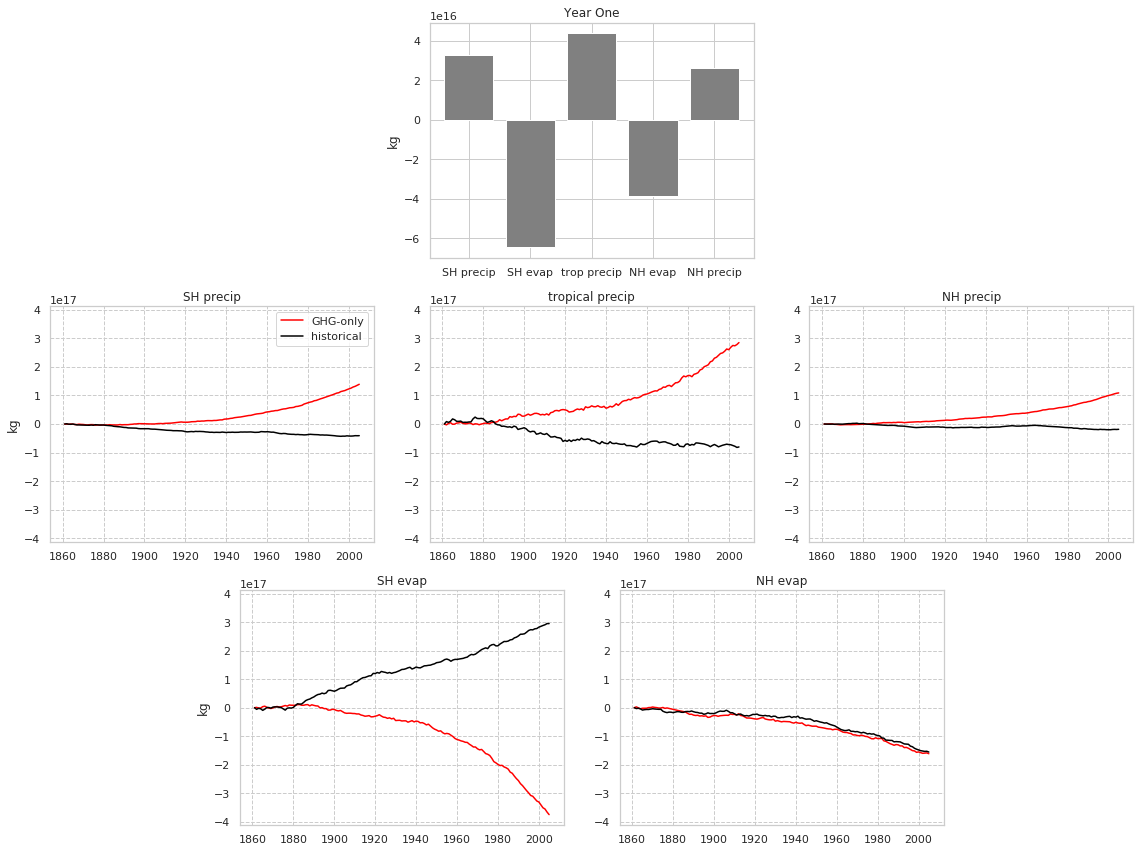

In [94]:
df_dict['GFDL-CM3'] = plot_data('GFDL-CM3')

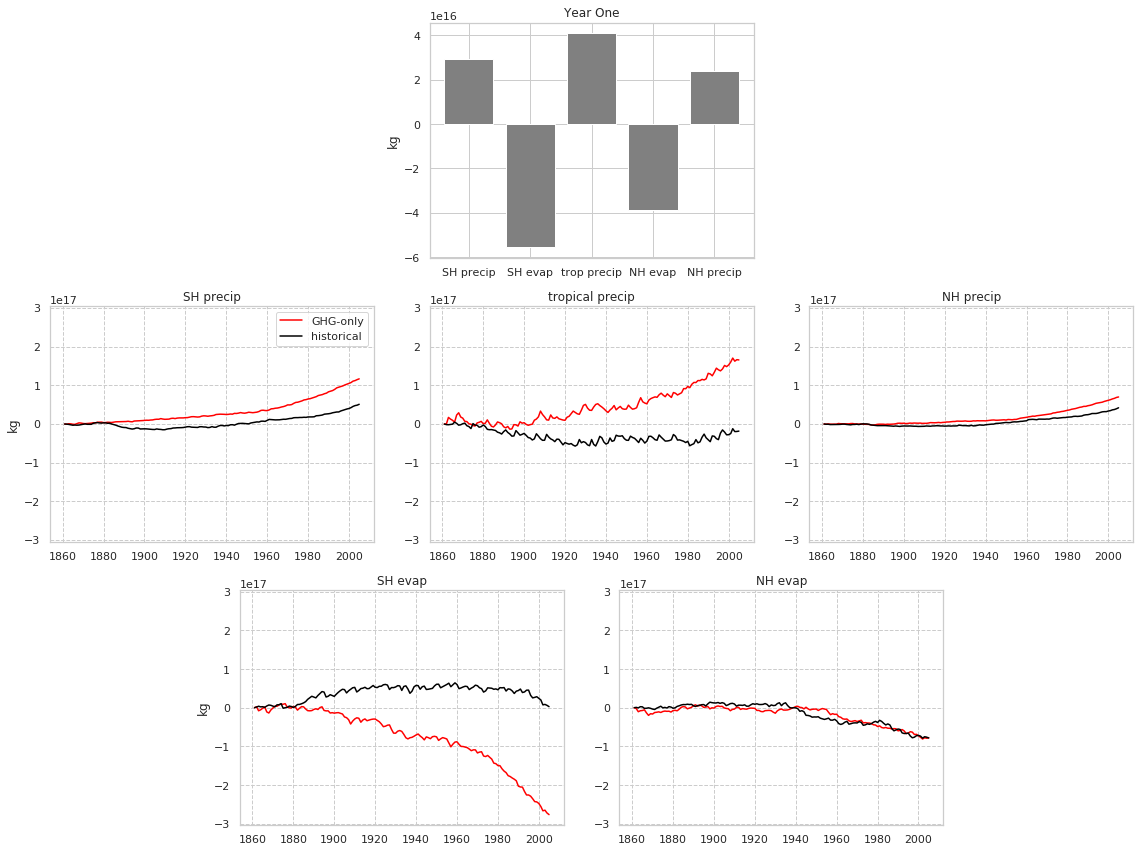

In [95]:
df_dict['GFDL-ESM2M'] = plot_data('GFDL-ESM2M')

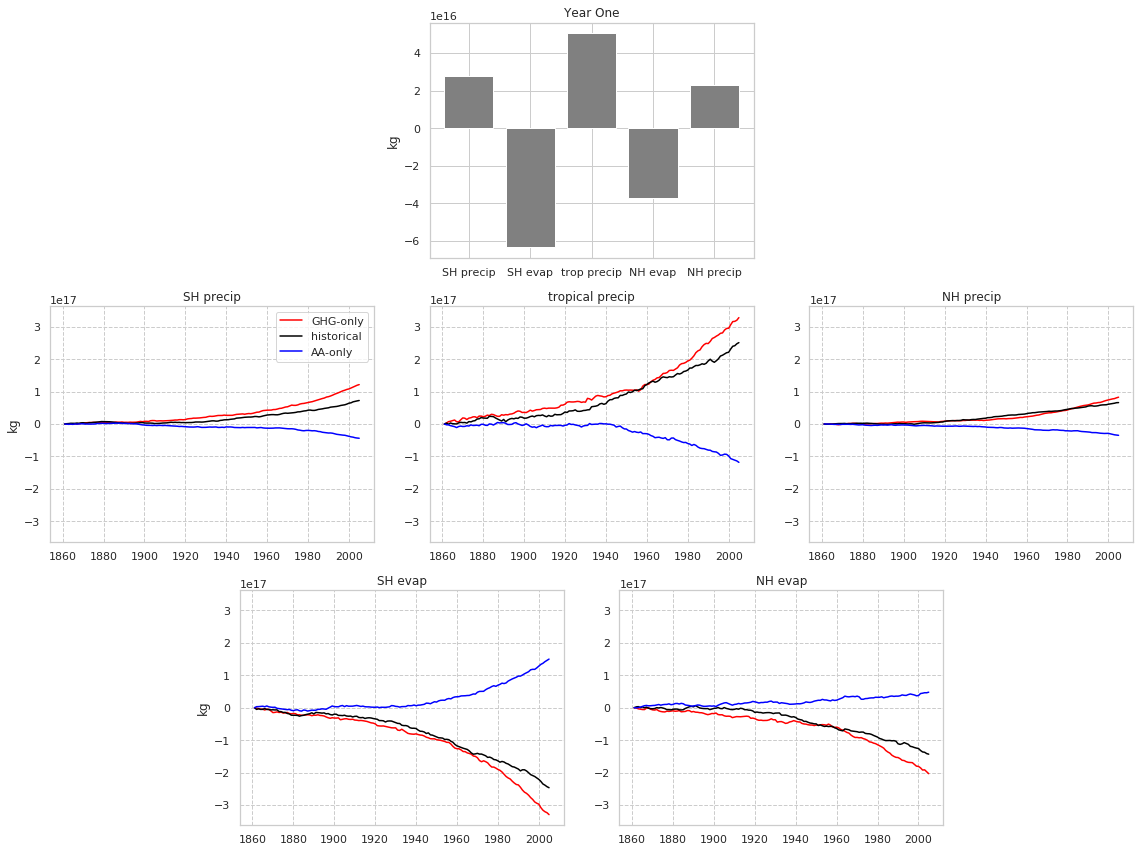

In [96]:
df_dict['GISS-E2-H'] = plot_data('GISS-E2-H')

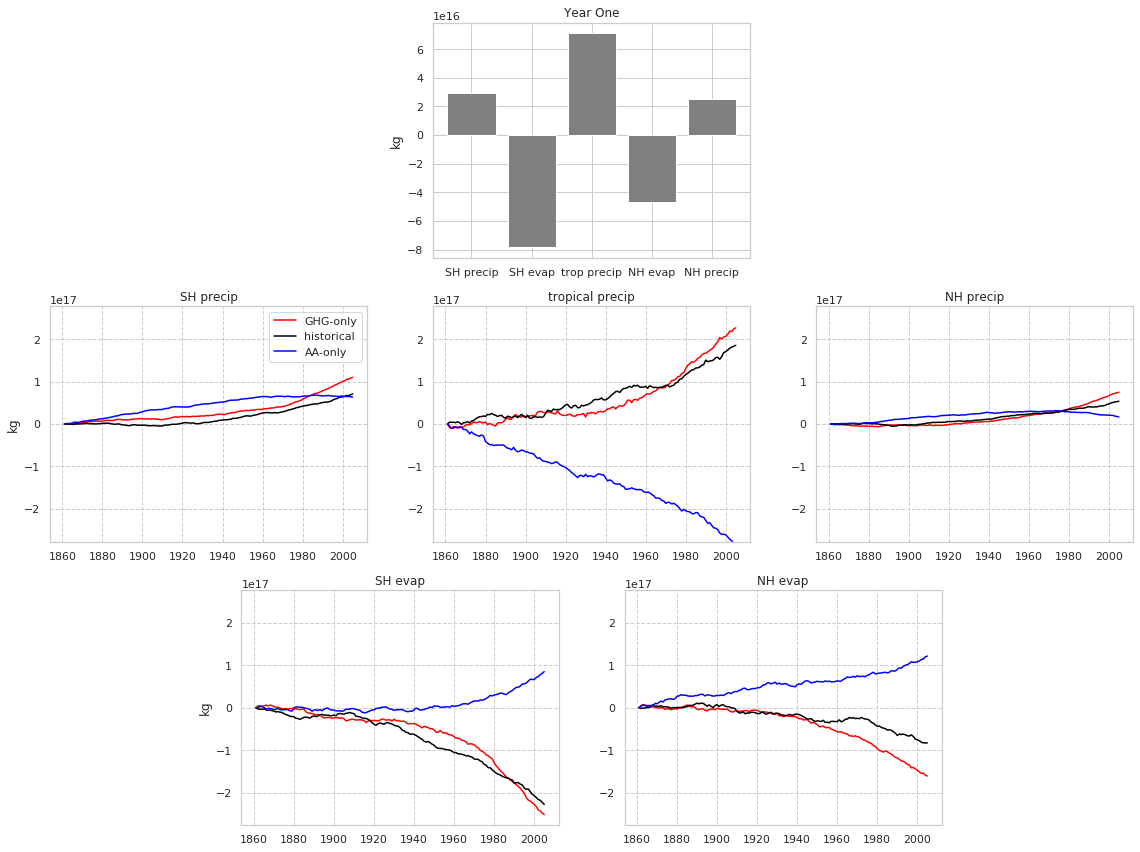

In [97]:
df_dict['GISS-E2-R'] = plot_data('GISS-E2-R')

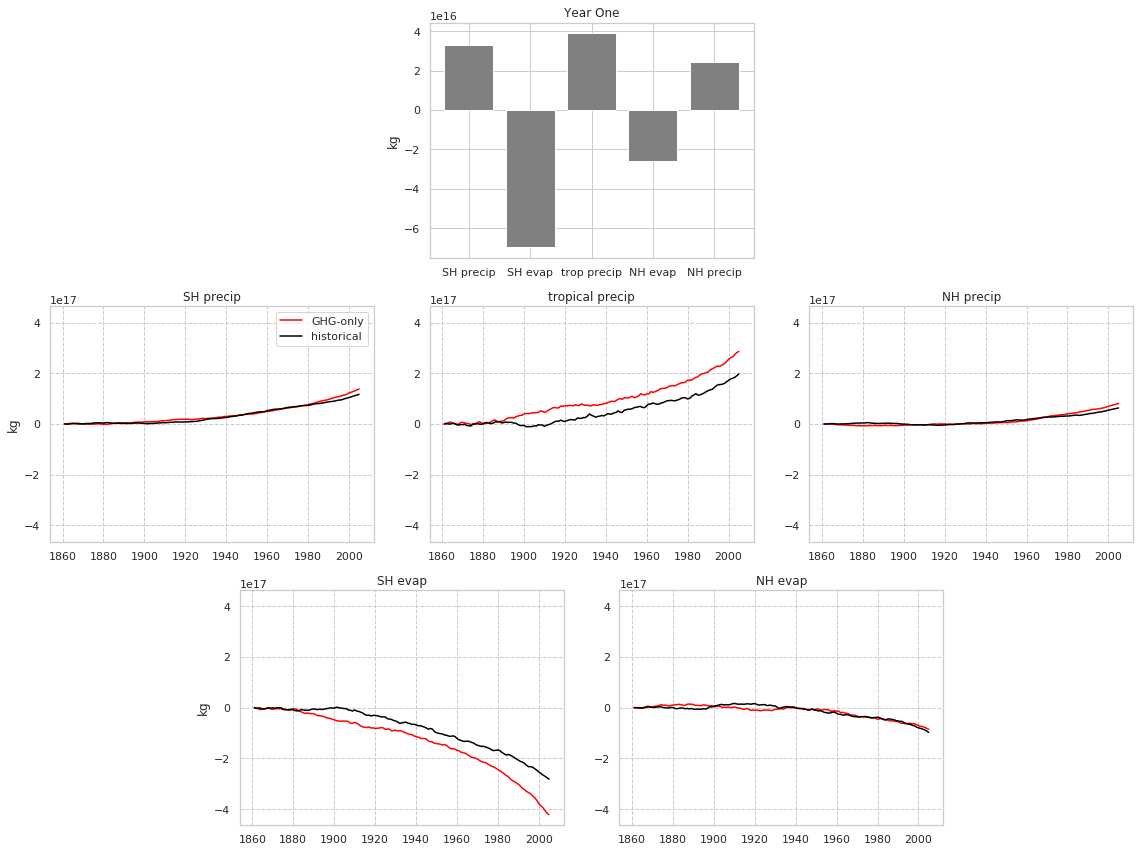

In [98]:
df_dict['IPSL-CM5A-LR'] = plot_data('IPSL-CM5A-LR')

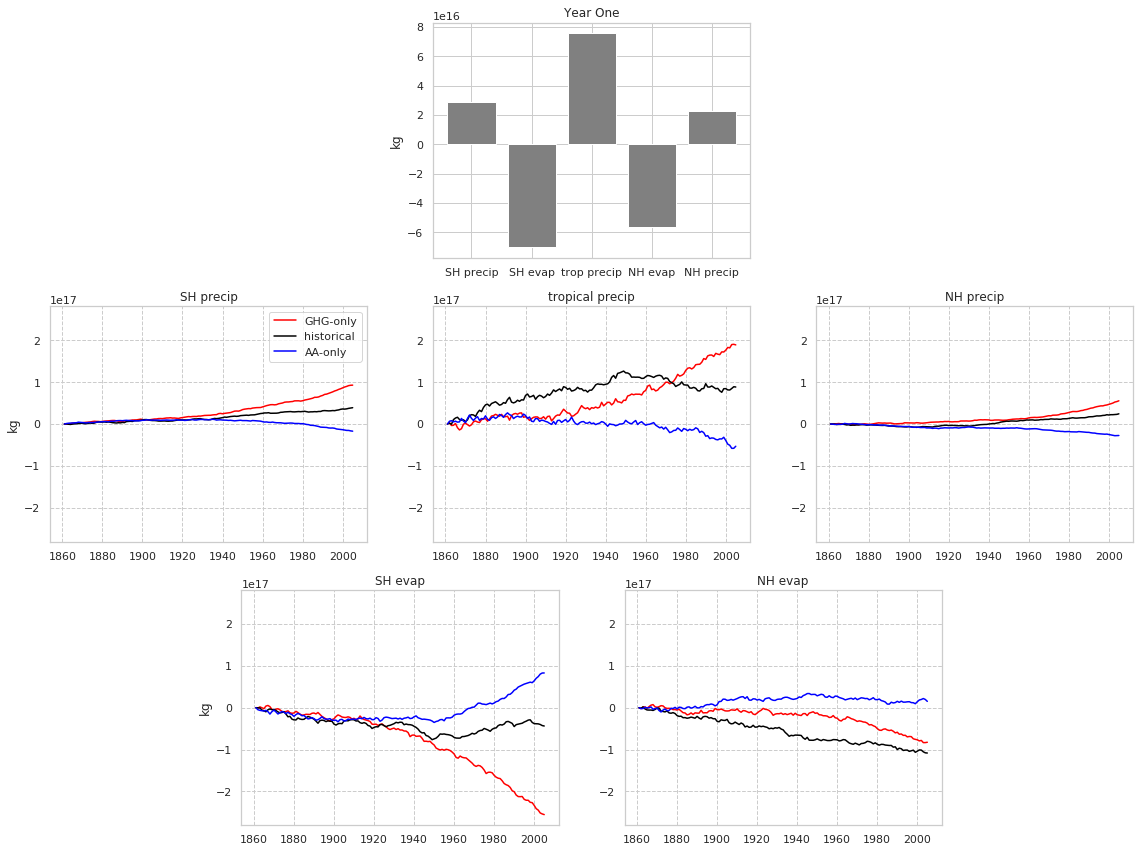

In [99]:
df_dict['NorESM1-M'] = plot_data('NorESM1-M')

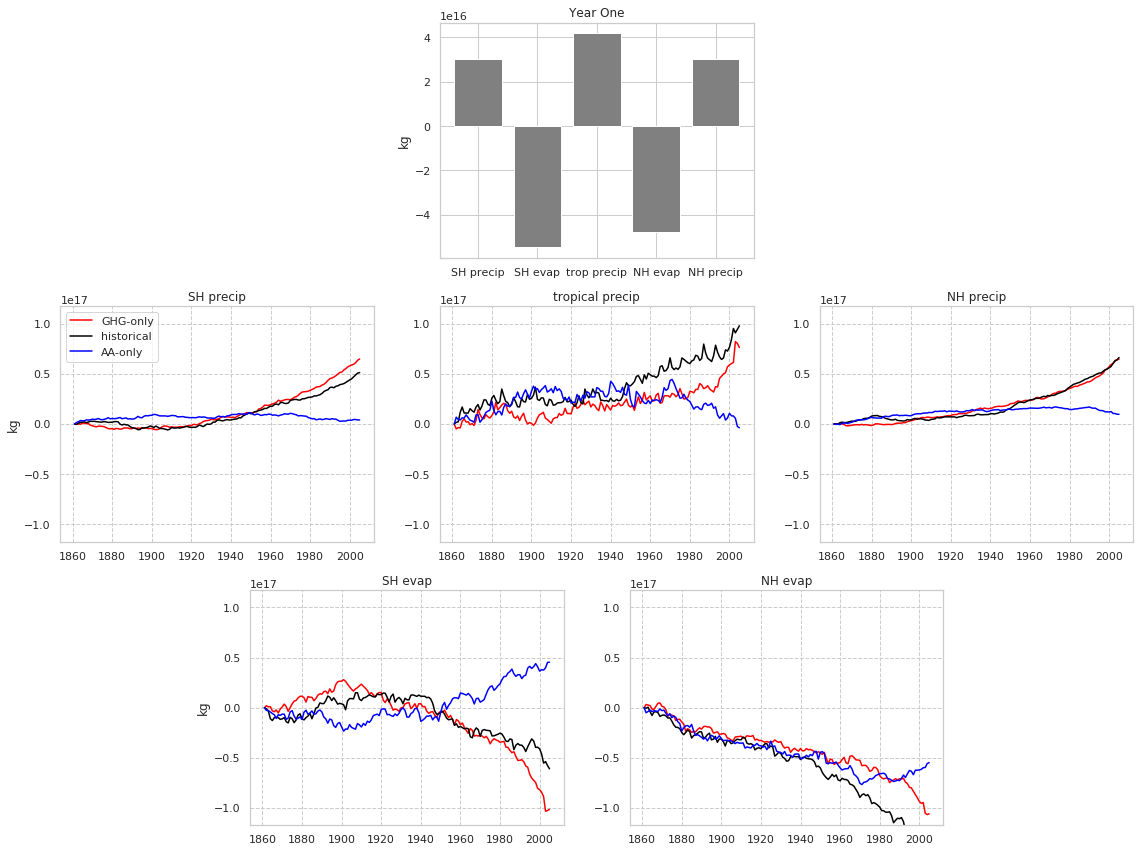

In [100]:
df_dict['CCSM4'] = plot_data('CCSM4')

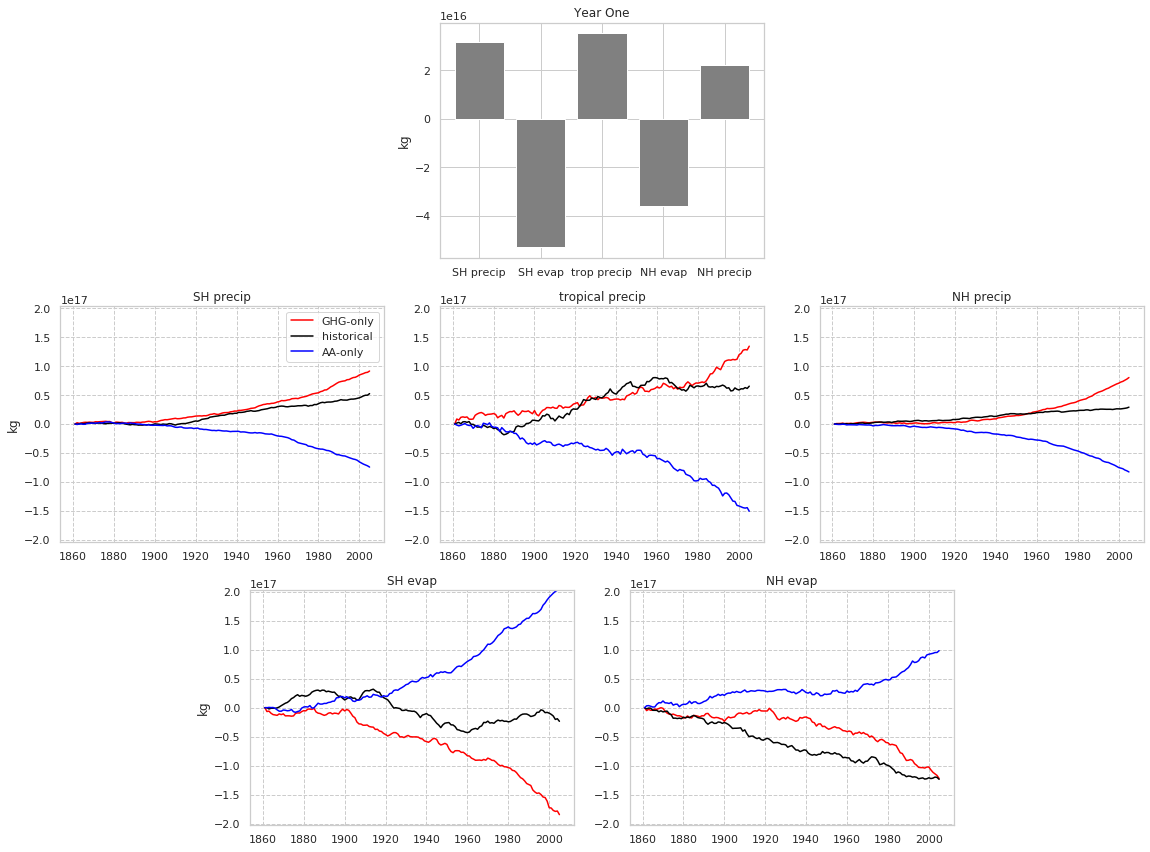

In [101]:
df_dict['CSIRO-Mk3-6-0'] = plot_data('CSIRO-Mk3-6-0')

In [102]:
ensemble_models = ['CanESM2', 'GFDL-CM3', 'GFDL-ESM2M',
                   'GISS-E2-H', 'GISS-E2-R', 'IPSL-CM5A-LR',
                   'NorESM1-M', 'CCSM4', 'CSIRO-Mk3-6-0']

In [103]:
df = df_dict[ensemble_models[0]]
for model in ensemble_models[1:]:
    df = df.append(df_dict[model], ignore_index=True)

In [105]:
df['change_sign_fix'] = df['change'].where((df['region'] == 'SH precip') | (df['region'] == 'tropical precip') | (df['region'] == 'NH precip'), df['change'] * -1)

In [106]:
df

,model,experiment,region,change,change_sign_fix
0,CanESM2,GHG-only,SH precip,1.096857e+17,1.096857e+17
1,CanESM2,historical,SH precip,2.138264e+16,2.138264e+16
2,CanESM2,AA-only,SH precip,-5.412309e+16,-5.412309e+16
3,CanESM2,GHG-only,SH evap,-2.156184e+17,2.156184e+17
4,CanESM2,historical,SH evap,2.103213e+16,-2.103213e+16
...,...,...,...,...,...
130,CSIRO-Mk3-6-0,historical,NH evap,-1.236678e+17,1.236678e+17
131,CSIRO-Mk3-6-0,AA-only,NH evap,9.838909e+16,-9.838909e+16
132,CSIRO-Mk3-6-0,GHG-only,NH precip,8.024655e+16,8.024655e+16
133,CSIRO-Mk3-6-0,historical,NH precip,2.908332e+16,2.908332e+16


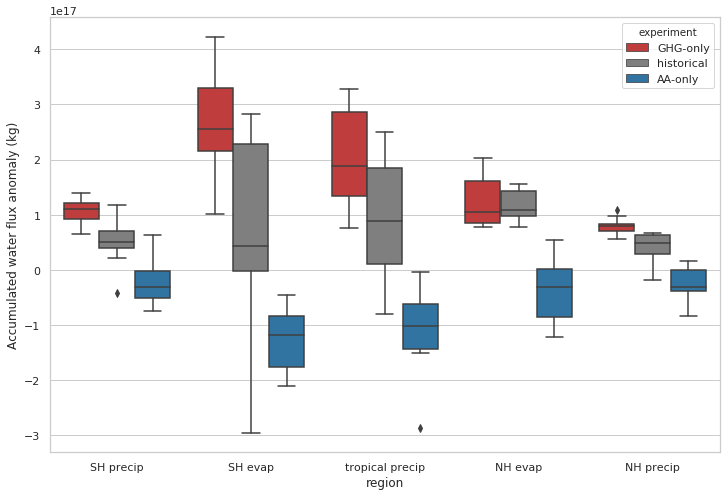

In [107]:
fig, ax = plt.subplots(1, 1, figsize=[12, 8])
sns.set(style="whitegrid")
#sns.swarmplot(x="Region", y="Change", hue="Experiment",
#              data=df, ax=axes, palette='hot')
my_pal = {"GHG-only": "tab:red", "historical": "tab:gray", "AA-only":"tab:blue"}
sns.boxplot(x="region", y="change_sign_fix", hue="experiment",
            data=df, ax=ax, palette=my_pal)
ax.set_ylabel('Accumulated water flux anomaly (kg)')
plt.show()

**Figure.** Accumulated precipitation or evaporation anomaly over the period 1861-2005. Positive values indicate an increase in precipitation for the SH, tropical and NH precip regions and an increase in evaporation for the SH and NH evap regions.